In [1]:
import crystal_toolkit
import os
from pymatgen.core import Structure

In [15]:
cif_name = gen_0

struct_expt = Structure.from_file(
    os.path.join("cif", f"{cif_name}.cif")
)
print(struct_expt)
struct_expt

NameError: name 'gen_0' is not defined

## pbe

In [4]:
# Relax with pbe

import matcalc

calculator_pbe = matcalc.load_fp("pbe")
relax_calc = matcalc.RelaxCalc( # type: ignore
    calculator_pbe,
    optimizer="FIRE",
    relax_atoms=True,
    relax_cell=True
)

data = relax_calc.calc(struct_expt)


In [ ]:
final_structure_pbe = data['final_structure']
print(final_structure_pbe)
final_structure_pbe

Full Formula (Cs2 K1 Y1 F6)
Reduced Formula: Cs2KYF6
abc   :   6.796599   6.796599   6.796598
angles: 119.848009 119.848005  90.263523
pbc   :       True       True       True
Sites (10)
  #  SP            a          b          c
---  ----  ---------  ---------  ---------
  0  Cs     0.75       0.25       0.5
  1  Cs     0.25       0.75       0.5
  2  K     -0         -0         -0
  3  Y      0.5        0.5        0
  4  F      0.273483   0.273483  -0
  5  F      0.726517   0.726517   0
  6  F      0.765031   0.319696   0.084727
  7  F      0.234969   0.680304   0.915273
  8  F      0.319695   0.234969   0.554665
  9  F      0.680305   0.765031   0.445336


/home/sabbir/matsimx/.venv/lib/python3.12/site-packages/pymatgen/analysis/local_env.py:4021: UserWarning:

No oxidation states specified on sites! For better results, set the site oxidation states in the structure.

/home/sabbir/matsimx/.venv/lib/python3.12/site-packages/pymatgen/analysis/local_env.py:4023: UserWarning:

No oxidation states specified on sites! For better results, set the site oxidation states in the structure.

/home/sabbir/matsimx/.venv/lib/python3.12/site-packages/pymatgen/analysis/local_env.py:3935: UserWarning:

CrystalNN: cannot locate an appropriate radius, covalent or atomic radii will be used, this can lead to non-optimal results.



In [8]:
phonon_calc = matcalc.PhononCalc( # type: ignore
    calculator_pbe,
    relax_structure=True,
    write_band_structure="output/ZFO0_75_phonon_bs.yaml",
    write_total_dos="output/ZFO0_75_phonon_dos.dat",
    write_phonon="output/ZFO0_75_phonon.yaml",
    optimizer="FIRE",
)

data_phonon_pbe = phonon_calc.calc(final_structure_pbe)

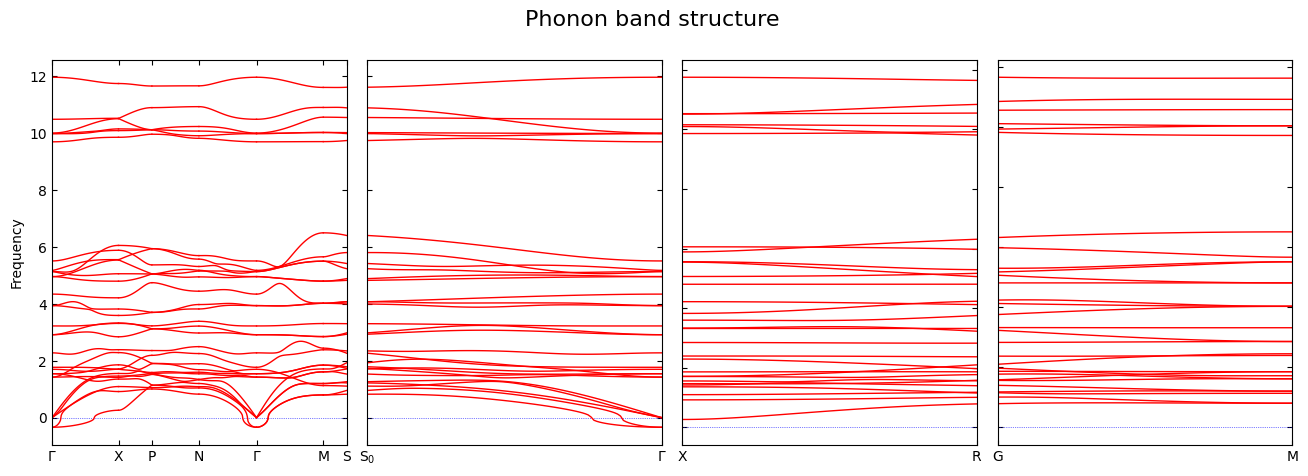

In [9]:
import matplotlib.pyplot as plt

phonon_bs = data_phonon_pbe['phonon'].band_structure

n_axes = sum(1 for c in phonon_bs.path_connections if not c)

fig, axs = plt.subplots(1, n_axes, figsize=(16, 5))

if n_axes == 1:
    axs = [axs]

for ax in axs[1:]:
    ax.set_ylabel('')
    ax.tick_params(axis='y', labelleft=False)

phonon_bs.plot(ax=axs)
fig.suptitle("Phonon band structure", fontsize=16)
plt.subplots_adjust(wspace=0.07)
plt.show()


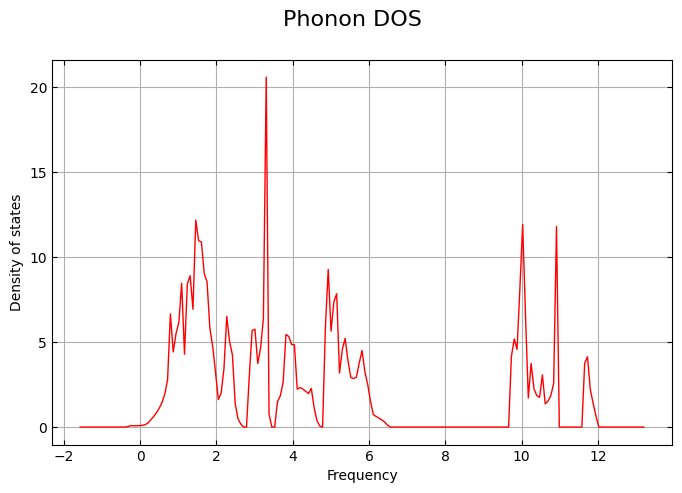

In [10]:
phonon_dos = data_phonon_pbe["phonon"].total_dos

fig, ax = plt.subplots(figsize=(8, 5))
phonon_dos.plot(ax=ax)
fig.suptitle("Phonon DOS", fontsize=16)
plt.show()

In [ ]:
plt.plot(
    data_phonon_pbe['thermal_properties']['temperatures'],
    data_phonon_pbe['thermal_properties']['heat_capacity']
)

plt.xlabel("Temperature (K)")
plt.ylabel('Heat Capacity (J/mol-K)')
plt.title("Heat Capacity vs Temperature")
plt.show()

## r2scan

In [11]:
## Relax with r2scan

import matcalc

calculator_r2scan = matcalc.load_fp("r2scan")
relax_calc = matcalc.RelaxCalc(
    calculator_r2scan,
    optimizer="FIRE",
    relax_atoms=True,
    relax_cell=True
)

data_r2scan = relax_calc.calc(struct_expt)


In [12]:
final_structure_r2scan = data_r2scan['final_structure']
print(final_structure_r2scan)
final_structure_r2scan

Full Formula (Cs2 K1 Y1 F6)
Reduced Formula: Cs2KYF6
abc   :   6.658775   6.658775   6.658774
angles: 119.961641 119.961638  90.066516
pbc   :       True       True       True
Sites (10)
  #  SP           a         b          c
---  ----  --------  --------  ---------
  0  Cs    0.75      0.25       0.5
  1  Cs    0.25      0.75       0.5
  2  K     0         0          0
  3  Y     0.5       0.5        0
  4  F     0.268719  0.268719  -0
  5  F     0.731281  0.731281   0
  6  F     0.77478   0.321272   0.096051
  7  F     0.22522   0.678728   0.903949
  8  F     0.321271  0.22522    0.546492
  9  F     0.678729  0.77478    0.453508


In [ ]:
phonon_calc = matcalc.PhononCalc( # type: ignore
    calculator_r2scan,
    relax_structure=True,
    write_band_structure="output/ZFO0_75_phonon_bs.yaml",
    write_total_dos="output/ZFO0_75_phonon_dos.dat",
    write_phonon="output/ZFO0_75_phonon.yaml",
    optimizer="FIRE",
)

data_phonon_pbe = phonon_calc.calc(final_structure_pbe)